In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [125]:
data=pd.read_csv(r'C:\Users\dhruv\Desktop\DataScience\Train.csv')

In [126]:
data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [127]:
data.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [129]:
data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [130]:
data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [131]:
data.shape

(23856, 18)

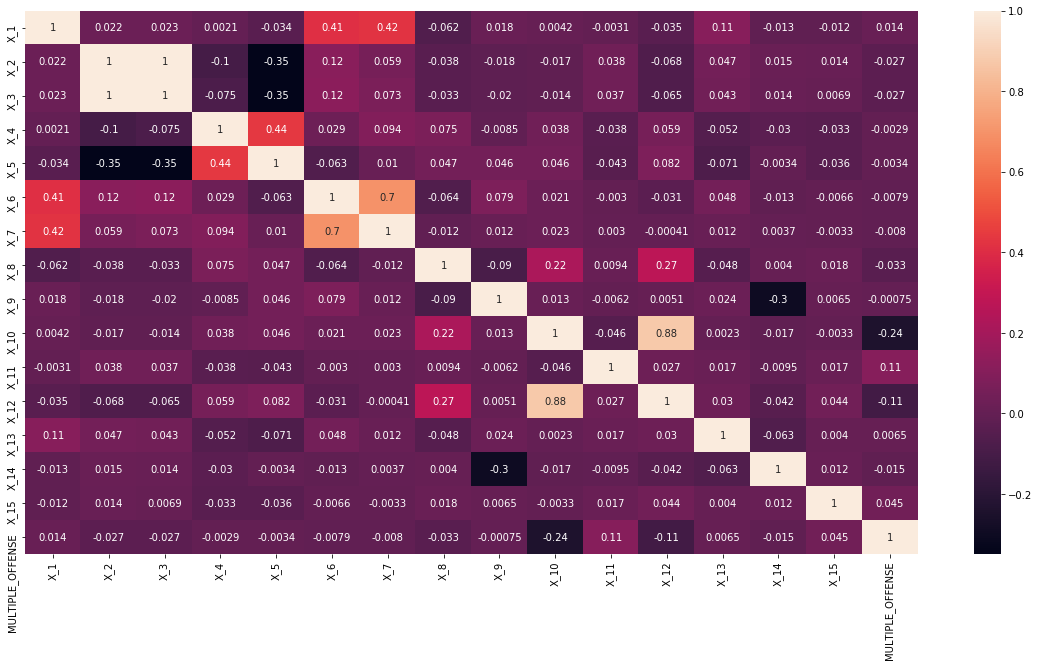

In [132]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [133]:
corr = data.corr()
acc1 = corr.abs().unstack()
acc1.sort_values(ascending = False)
display(acc1[acc1 > 0.5])

X_1               X_1                 1.000000
X_2               X_2                 1.000000
                  X_3                 0.996985
X_3               X_2                 0.996985
                  X_3                 1.000000
X_4               X_4                 1.000000
X_5               X_5                 1.000000
X_6               X_6                 1.000000
                  X_7                 0.695243
X_7               X_6                 0.695243
                  X_7                 1.000000
X_8               X_8                 1.000000
X_9               X_9                 1.000000
X_10              X_10                1.000000
                  X_12                0.877743
X_11              X_11                1.000000
X_12              X_10                0.877743
                  X_12                1.000000
X_13              X_13                1.000000
X_14              X_14                1.000000
X_15              X_15                1.000000
MULTIPLE_OFFE

In [134]:

#Printing correlation
print(round(data[["X_10","MULTIPLE_OFFENSE",]].corr(),2),end="\n\n")
print(round(data[["X_12","MULTIPLE_OFFENSE",]].corr(),2))



                  X_10  MULTIPLE_OFFENSE
X_10              1.00             -0.24
MULTIPLE_OFFENSE -0.24              1.00

                  X_12  MULTIPLE_OFFENSE
X_12              1.00             -0.11
MULTIPLE_OFFENSE -0.11              1.00


In [135]:
data.drop('X_2',axis=1,inplace=True)

In [136]:
data.drop('X_7',axis=1,inplace=True)

In [137]:
data.drop('X_10',axis=1,inplace=True)

In [138]:
data.drop('INCIDENT_ID',axis=1,inplace=True)

In [139]:
data['DATE'].nunique()

9121

In [140]:
Inc_ID=data['INCIDENT_ID'].copy()

KeyError: 'INCIDENT_ID'

In [48]:
data['DATE']=pd.to_datetime(data['DATE'])

In [47]:
Inc_ID

0        CR_102659
1        CR_189752
2        CR_184637
3        CR_139071
4        CR_109335
           ...    
23851     CR_88991
23852     CR_46369
23853    CR_157556
23854    CR_103180
23855     CR_22575
Name: INCIDENT_ID, Length: 23856, dtype: object

In [141]:
data.head()

,DATE,X_1,X_3,X_4,X_5,X_6,X_8,X_9,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,04-JUL-04,0,34,2,1,5,1,6,174,1.0,92,29,36,0
1,18-JUL-17,1,37,0,0,11,1,6,236,1.0,103,142,34,1
2,15-MAR-17,0,2,3,5,1,2,3,174,1.0,110,93,34,1
3,13-FEB-09,0,32,2,1,7,1,6,249,1.0,72,29,34,1
4,13-APR-05,0,32,2,1,8,0,5,174,0.0,112,29,43,1


In [143]:
data.drop(['DATE'],axis=1,inplace=True)

In [58]:
Inc_ID

0        CR_102659
1        CR_189752
2        CR_184637
3        CR_139071
4        CR_109335
           ...    
23851     CR_88991
23852     CR_46369
23853    CR_157556
23854    CR_103180
23855     CR_22575
Name: INCIDENT_ID, Length: 23856, dtype: object

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X_1               23856 non-null  int64  
 1   X_3               23856 non-null  int64  
 2   X_4               23856 non-null  int64  
 3   X_5               23856 non-null  int64  
 4   X_6               23856 non-null  int64  
 5   X_8               23856 non-null  int64  
 6   X_9               23856 non-null  int64  
 7   X_11              23856 non-null  int64  
 8   X_12              23674 non-null  float64
 9   X_13              23856 non-null  int64  
 10  X_14              23856 non-null  int64  
 11  X_15              23856 non-null  int64  
 12  MULTIPLE_OFFENSE  23856 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.4 MB


In [142]:
data['X_12'] = data['X_12'].fillna((data['X_12'].mean())).astype(int)

In [144]:
data.head()

,X_1,X_3,X_4,X_5,X_6,X_8,X_9,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,34,2,1,5,1,6,174,1,92,29,36,0
1,1,37,0,0,11,1,6,236,1,103,142,34,1
2,0,2,3,5,1,2,3,174,1,110,93,34,1
3,0,32,2,1,7,1,6,249,1,72,29,34,1
4,0,32,2,1,8,0,5,174,0,112,29,43,1


In [145]:

# Putting feature variable to X
X = data.drop(['MULTIPLE_OFFENSE'],axis=1)

# Putting response variable to y
y = data['MULTIPLE_OFFENSE']

In [146]:
print(X.shape,y.shape)

(23856, 12) (23856,)


In [78]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

In [147]:


# Let's run the model using the selected variables
log = LogisticRegression()
#logsk.fit(X_train[col], y_train)
log.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:

# Predicted probabilities
y_pred = log.predict(X_test)
y_pred
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

[[   2  205]
 [   8 4557]]


0.9553646269907795

In [87]:
accuracy_score(y_train, log.predict(X_train))

0.9547788723538042

In [107]:

xgb_params = {  
                "learning_rate":[0.01,0.05,0.1],
                "gamma":[i/10.0 for i in range(0,2)],#change in ginni index
                "max_depth": [2,3,4],
                "min_child_weight":[1,2,4],#no of samples falling in each node
                "max_delta_step":[0,1,2,5,10],#control the upcoming updates
                "n_estimators":[100,200,50]
             }

In [108]:
xgb=XGBClassifier(objective='binary:logistic')

In [150]:

n_iter=2

random_search=RandomizedSearchCV(xgb,cv=2,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=2, n_jo

In [151]:
xgb_best=random_search.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=2, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=2, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
xgb_train_prediction=xgb_best.predict(X_test)
xgb_train_prediction

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [119]:
accuracy_score(y_train, xgb_best.predict(X_train))

0.9908824145881366

In [154]:
y_predict = xgb_best.predict(X_test)
y_predict
# Converting y_pred to a dataframe which is an array
y_predict_df = pd.DataFrame(y_predict)
accuracy=accuracy_score(y_test,y_predict)
accuracy
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test, y_predict))
from sklearn import metrics
metrics.accuracy_score(y_test,y_predict)

[[ 204    3]
 [   1 4564]]


0.9991617770326907